<a href="https://colab.research.google.com/github/kfukutom/cscs-335/blob/main/kfukutom_hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The file denmark.txt contains a social network of
# acquaintanceship among a group of students in Denmark. In this assignment you’ll study the
# spread of a fictitious disease through this network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from pylab import plot
# Package Dependencies

Largest cluster @ T = 0.5: 47
Average fraction of the infected: 110.82
Probability of an epidemic: 0.911


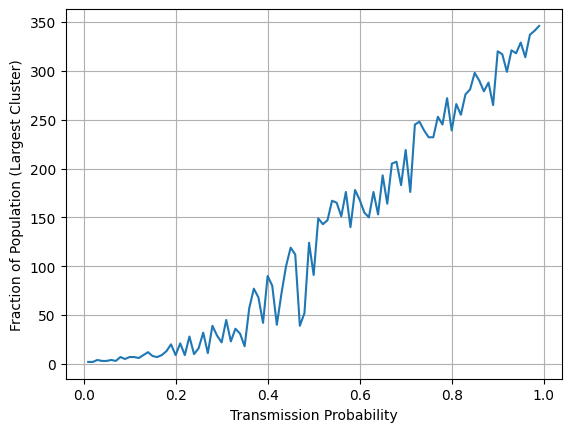

In [ ]:
# (a)
G = nx.read_adjlist("denmark.txt", nodetype=int)

# (b)
H = G.copy()
T = 0.5
N = G.number_of_nodes()
for edge in list(H.edges()):
  #print(edge)
  if (np.random.random() > T):
    H.remove_edge(*edge) #unpack a tuple ()
cluster = len(max(nx.connected_components(H), key=len))
print(f"Largest cluster @ T = {T}: {cluster}")

# Trial & Repeat
cluster_lst = []

for i in range(1000):
  H = G.copy()
  for edge in list(H.edges()):
    if (np.random.random() > T):
      H.remove_edge(*edge) # * unpacks, positional dereferncing
  size = len(max(nx.connected_components(H), key=len))
  cluster_lst.append(size)

# Outputing my result(s):
print(f"Average fraction of the infected: {np.mean(cluster_lst)}")
print(f"Probability of an epidemic: {sum(s > 0.2 * N for s in cluster_lst) / 1000}")


# (e) ~ (f), Program Extension:
values = [i * 0.01 for i in range(1, 100)]
average_cluster_lst = []
for T in values:
  H = G.copy()
  for edge in list(H.edges()):
    if (np.random.random() > T):
      H.remove_edge(*edge)
  size = len(max(nx.connected_components(H), key=len))
  average_cluster_lst.append(size)

# Graphing my RESULT:
plt.plot(values, average_cluster_lst)
plt.xlabel("Transmission Probability")
plt.ylabel("Fraction of Population (Largest Cluster)")
plt.grid(True)

Based on my graph, I would say around 0.25-0.35. I come to this conclusion looking at this graph, and seeing the feature become less flat, and much more steep showcases some indication.

In [ ]:
# Question (2), Acquaintance Immunization & Beyond
G = nx.read_adjlist("denmark.txt", nodetype=int)
N = (G.number_of_nodes())

# (a) Random vaccination, standard (ver.)
H = G.copy()
to_remove = random.sample(list(H.nodes()), N // 4)
H.remove_nodes_from(to_remove)
large_a = len(max(nx.connected_components(H), key=len)) / N
#print(f"Part (a) results: {large_a}")

# (b) Acquaintance immunization
H = G.copy()
nodes_vacc = set()

while(len(nodes_vacc) < (N // 4)):
  node_r = random.choice(list(H.nodes()))
  neighbors = list(H.neighbors(node_r))

  if (neighbors):
    neighbor = random.choice(neighbors)
    nodes_vacc.add(neighbor)

H.remove_nodes_from(nodes_vacc)
large_b = (len(max(nx.connected_components(H), key=len)) /N)

# (c) Run multiple trials
random_res = []
acquaintance_res = []

for iters in range(100):
  # (Random vaccination)
  H = G.copy()
  nodes_to_remove = random.sample(list(H.nodes()), N//4)
  H.remove_nodes_from(nodes_to_remove)
  random_res.append( len(max(nx.connected_components(H), key=len)) / N )

  # (Acquaintance immunization)
  """REQUIRES: vaccinated_nodes is a set(), neighbor exists"""
  H = G.copy()
  vaccinated_nodes = set()
  while (len(vaccinated_nodes) < N // 4):

    random_node = random.choice(list(H.nodes()))
    neighbors = list(H.neighbors(random_node))

    if neighbors:
      neighbor = random.choice(neighbors)
      vaccinated_nodes.add(neighbor)

  H.remove_nodes_from(vaccinated_nodes)
  acquaintance_res.append(len(max(nx.connected_components(H), key=len))/N)

print("Our size of the largest component in this new network as a `fraction`:")
print("--------------------------------------------------------------------")
print(f"Random Vaccination: {np.mean(random_res):.4f}")
print(f"Acquaintance immunization: {np.mean(acquaintance_res):.4f}")

Our size of the largest component in this new network as a `fraction`:
--------------------------------------------------------------------
Random Vaccination: 0.4911
Acquaintance immunization: 0.2191




---


Comparing what we got with part (a), which is random vaccination, the fraction of the new network was around half for A, which is definitely not a very `successful` result by standard. However with acquaintance immunization, we got something MUCH lower on average. The theory behind as to why this might be a good idea to pursue onwards is because, in the case of acquaintance immunization, it specifically targets nodes that contribute disproportionately to the network's overall connectivity, making it a much more viable and efficient strategy for controlling the spread of diseases like we've modeled in this case. Hence, it's best to interpret this result as part (a) doesn't target critical parts of the network, and these networks are often highly, highly dependent on only a few central nodes for their overall connectivity.

In [ ]:
# in-class code for reference (3):
"""
-- DO NOT RUN --

from networkx import read_adjlist
from numpy import zeros, empty
from random import random, randrange, choice
from pylab import plot

RATIO = 0.25
PLEAN = 0.1

# Read network
G = read_adjlist("denmark.txt", nodetype=int)
n = G.number_of_nodes()

# Leans
lean = empty(n, int)
for i in range(n):
    lean[i] = 0 if random() < 0.5 else 1

# Set opinions
s = zeros(n, int)
for i in range(n):
    if random() < RATIO:
        s[i] = 1

n1 = sum(s)

# Main loop
results = []
iterations = 100000
for t in range(iterations):
    i = randrange(n)
    j = choice(list(G.neighbors(i)))
    if random() < PLEAN:
        s[i] = lean[i]
    else:
        s[i] = s[j]

    n1 = sum(s)
    results.append(n1)
"""

'\n-- DO NOT RUN --\n\nfrom networkx import read_adjlist\nfrom numpy import zeros, empty\nfrom random import random, randrange, choice\nfrom pylab import plot\n\nRATIO = 0.25\nPLEAN = 0.1\n\n# Read network\nG = read_adjlist("denmark.txt", nodetype=int)\nn = G.number_of_nodes()\n\n# Leans\nlean = empty(n, int)\nfor i in range(n):\n    lean[i] = 0 if random() < 0.5 else 1\n\n# Set opinions\ns = zeros(n, int)\nfor i in range(n):\n    if random() < RATIO:\n        s[i] = 1\n\nn1 = sum(s)\n\n# Main loop\nresults = []\niterations = 100000\nfor t in range(iterations):\n    i = randrange(n)\n    j = choice(list(G.neighbors(i)))\n    if random() < PLEAN:\n        s[i] = lean[i]\n    else:\n        s[i] = s[j]\n\n    n1 = sum(s)\n    results.append(n1)\n'

In [ ]:
# Question (3):
RATIO = 0.25
G = nx.read_adjlist("denmark.txt", nodetype=int)
N = G.number_of_nodes()

steps_list = []
final_consensus = []

for t in range(100):
  s = np.zeros(N, int)
  n1 = 0

  for i in range(N):
    if (random.random() < RATIO):
      s[i] = 1
      n1 += 1

  steps = 0
  while 0 < n1 < N:
    i = random.randrange(N)
    neighbors = list(G.neighbors(i))
    if neighbors:
      j = random.choice(neighbors)
      if s[i] != s[j]:
        if s[i] == 1:
          n1 -= 1
        else:
          n1 += 1
        s[i] = s[j]
    steps += 1

  steps_list.append(steps)
  final_consensus.append(1 if n1 == N else 0)

step_mean = np.mean(steps_list)
std_stp = np.std(steps_list)

print(f"Consensus Mean Step(s): {step_mean}")
print(f"Standard Deviation: {std_stp}")
print(f"Fraction of all-zero consensus: {1-(sum(final_consensus) / 100)}")

Consensus Mean Step(s): 121500.23
Standard Deviation: 117086.353251765
Fraction of all-zero consensus: 0.76




---

So the results show that consensus is always achieved, with a notable bias toward the majority opinion (0s ), which occurs about 76% of the time. This aligns with expectations since 75% of the nodes initially hold opinion 0. On average, the process takes approximately ~121500 steps to reach consensus, but there seems to be some existing significant variability, as shown by the large standard deviation of 117086 steps.

If we increased our ratio to 0.5, the final consensus would probably be more evenly split between 0s and 1s over multiple runs, approaching a 50-50 outcome. BUT, the time to reach consensus would most definitely: **increase**.




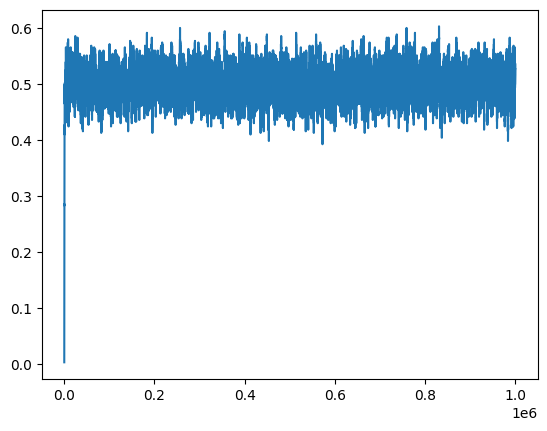

In [ ]:
# Question (4):
RATIO = 0.25
G = nx.read_adjlist("denmark.txt", nodetype=int)
N = G.number_of_nodes()
S = np.zeros(N, int)

for i in range(N):
  if random.random() < RATIO:
    S[i] = 1

iters = (1000000)
frac_one = []

for t in range(iters):
  i = (random.randrange(N))

  if (random.random() < 0.5):
    neighbors = list(G.neighbors(i))

    if neighbors:
      j = random.choice(neighbors)
      s[i] = s[j]

  else:
    neighbor_i = list(set(G.nodes) - set(G.neighbors(i)) - {i})
    if (neighbor_i):
      j = random.choice(neighbor_i)
      s[i] = 1 - s[j]

  frac_one.append(sum(s) / N) #final frac

plot(frac_one)



---
My interpretation of the graph is a overtime, stabilization of formed voter opinions, hovering around 0.5, 50/50. By oscillating around this threshold, from what we see, we can infer that nodes are likely adopting to their neighbors' formed opinions, and being more adoptive to their non-neighbors as well. Additionally, the randomness in our method is likely causing the high fluctuations of the graph, showing this graphically unpleasing feature of high variation around 0.5, or this baseline threshold it's showing.